In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Import datasets
df_vuelos = pd.read_csv("D:/Documentos/Python Scripts/Datathon 2024/Filghts TEC_Valid.csv")
df_ventas = pd.read_csv("D:/Documentos/Python Scripts/Datathon 2024/Sales TEC_Valid.csv")

In [94]:
# Convert date strings to datetime objects, then sort dataframe by departure date
df_vuelos["STD"] = pd.to_datetime(df_vuelos["STD"])
df_vuelos["STA"] = pd.to_datetime(df_vuelos["STA"])

df_vuelos = df_vuelos.sort_values(by="STD")

# Filter only data where Passengers and Bookings are not NaN (this is the training data)
df_vuelos_1 = df_vuelos[ df_vuelos["Passengers"].notna() ]
df_vuelos_2 = df_vuelos_1.dropna()
display(df_vuelos_2)

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
6696,030f35839975b1721e2427db425ef402,XA-VAJ,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-01-02 00:20:00,2023-01-02 05:20:00,186,120.0,68.0
178553,7b9f51daca0f560676d28aee3d5666f7,XA-VAW,BM,BA,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:30:00,2023-01-02 06:00:00,186,170.0,99.0
53258,d4ac6f26a94efea00002147f15d96a41,XA-VIU,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:35:00,2023-01-02 05:30:00,186,185.0,89.0
123223,555496d4217768d1cc276ffbe83235d5,XA-VXF,AT,AU,Ecoturismo,Ciudad Principal,2023-01-02 00:55:00,2023-01-02 02:45:00,240,168.0,118.0
53248,01cb03565042d43a1deafae09eef0ca1,XA-VAN,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 01:15:00,2023-01-02 06:10:00,186,165.0,92.0
...,...,...,...,...,...,...,...,...,...,...,...
221868,a665d50e95bf905d862563facacbf05a,XA-VXA,AO,BM,Ciudad Fronteriza,Ciudad Principal,2023-12-31 23:00:00,2024-01-01 00:05:00,240,201.0,90.0
92561,6dda5bd834419dd5b900408b0f5fd77b,XA-VAU,BM,AT,Ciudad Principal,Ciudad Fronteriza,2023-12-31 23:05:00,2024-01-01 04:30:00,186,131.0,81.0
105522,c711d31ee17b65d788d2df7ebde346f1,XA-VBI,AK,AT,Ciudad Principal,Playa,2023-12-31 23:15:00,2024-01-01 00:45:00,220,217.0,126.0
57082,dc6b4fa09794681fbf19cdd98f5a942e,XA-VIF,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-12-31 23:45:00,2024-01-01 04:40:00,186,168.0,75.0


In [69]:
# Calculate average number of Passengers and Bookings each month
df_v_m = df_vuelos_1
df_v_m["Month"] = df_v_m["STD"].dt.month    # Calculate months
df_month_avg = df_v_m[["Month","Passengers","Bookings"]].groupby("Month", as_index=False).mean().round()
# df_month_avg = df_vuelos_1[["Passengers","Bookings"]].groupby( by=df_vuelos_1["STD"].dt.month, as_index=False ).mean().round()
df_month_avg = df_month_avg.rename(columns={"Passengers":"Mean Passengers","Bookings":"Mean bookings"})
display(df_month_avg)

C:\Users\missa\AppData\Local\Temp\ipykernel_14904\3815676536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v_m["Month"] = df_v_m["STD"].dt.month    # Calculate months


,Month,Mean Passengers,Mean bookings
0,1,174.0,109.0
1,2,177.0,114.0
2,3,181.0,116.0
3,4,185.0,112.0
4,5,185.0,117.0
5,6,185.0,115.0
6,7,191.0,110.0
7,8,187.0,109.0
8,9,182.0,117.0
9,10,188.0,118.0


In [136]:
# Determine keys of departure and arrival stations}
f = lambda x: [x, len(x)]
print(f(df_vuelos_2.sort_values(by="DepartureStation")["DepartureStation"].unique()))
# print(df_vuelos_2.sort_values(by="ArrivalStation")["ArrivalStation"].unique())

# df_vuelos_2[ df_vuelos_2["DepartureStation"] == 'BM' ][ df_vuelos_2["ArrivalStation"] == 'AV' ]

# print(41 * 40)
# df_vuelos_2["Time"] = df_vuelos_2["STD"].dt.time
# df_vuelos_2[(df_vuelos_2["DepartureStation"] == "AB") & (df_vuelos_2["ArrivalStation"] == "AK")][["DepartureStation","ArrivalStation","STD","Time","Capacity"]].sort_values(by="ArrivalStation")
# df_vuelos_2[(df_vuelos_2["DepartureStation"] == "AB") & (df_vuelos_2["ArrivalStation"] == "AK")].sort_values("Time")["Time"].unique()

dep_arr_codes = list(df_vuelos_2.sort_values(by="DepartureStation")["DepartureStation"].unique())
df_pairs = {"Route":[],"Count":[]}
for k1 in dep_arr_codes:
    for k2 in dep_arr_codes:
        if k1 != k2:
            df_pairs["Route"].append(k1 + " => " + k2)
            c = len( df_vuelos_2[(df_vuelos_2["DepartureStation"]==k1) & (df_vuelos_2["ArrivalStation"]==k2)] )
            df_pairs["Count"].append(c)
        # else:
        #     continue
        
        # print(df_pairs)
        
df_pairs = pd.DataFrame(df_pairs)
display(df_pairs)

[array(['AB', 'AC', 'AD', 'AE', 'AF', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AO',
       'AP', 'AQ', 'AR', 'AS', 'AT', 'AU', 'AV', 'AW', 'AX', 'AY', 'AZ',
       'BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG', 'BH', 'BI', 'BJ', 'BK',
       'BL', 'BM', 'BN', 'BO', 'BP', 'BQ', 'BS', 'BT'], dtype=object), 41]


,Route,Count
0,AB => AC,0
1,AB => AD,0
2,AB => AE,0
3,AB => AF,0
4,AB => AI,0
...,...,...
1635,BT => BN,0
1636,BT => BO,0
1637,BT => BP,0
1638,BT => BQ,0


In [137]:
df_pairs[df_pairs["Count"] != 0]

,Route,Count
6,AB => AK,86
14,AB => AT,246
17,AB => AW,125
21,AB => BA,115
57,AC => AW,2
...,...,...
1610,BT => AO,7
1615,BT => AT,30
1618,BT => AW,25
1622,BT => BA,24


(160.0, 200.0)

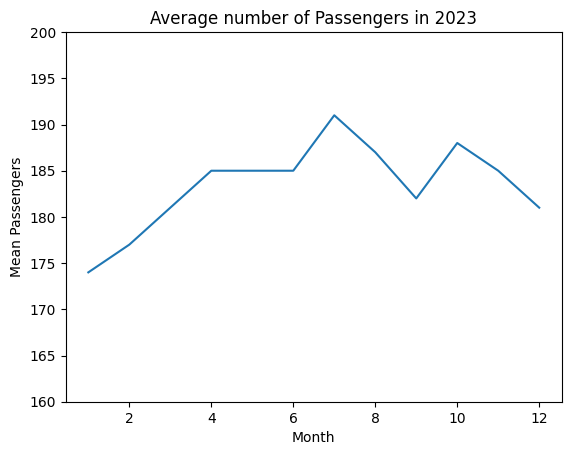

In [80]:
# Plot
fig, ax = plt.subplots()
ax.plot(df_month_avg["Month"],df_month_avg["Mean Passengers"])
ax.set_ylabel("Mean Passengers")
ax.set_xlabel("Month")
ax.set_title("Average number of Passengers in 2023")
ax.set_ylim(bottom=160, top=200)